# Modular Multiplication

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `CtrlModMul`
Perform controlled `x *= k mod m` for constant k, m and variable x.

#### Parameters
 - `k`: The integer multiplicative constant.
 - `mod`: The integer modulus.
 - `bitsize`: The size of the `x` register. 

#### Registers
 - `ctrl`: The control bit
 - `x`: The integer being multiplied


In [2]:
from qualtran.bloqs.factoring.mod_mul import CtrlModMul

### Example Instances

In [3]:
modmul = CtrlModMul(k=123, mod=13 * 17, bitsize=8)

In [4]:
import sympy

k, N, n_x = sympy.symbols('k N n_x')
modmul_symb = CtrlModMul(k=k, mod=N, bitsize=n_x)

#### Graphical Signature

In [5]:
from qualtran.drawing import show_bloqs
show_bloqs([modmul_symb, modmul],
           ['`modmul_symb`', '`modmul`'])

### Decomposition

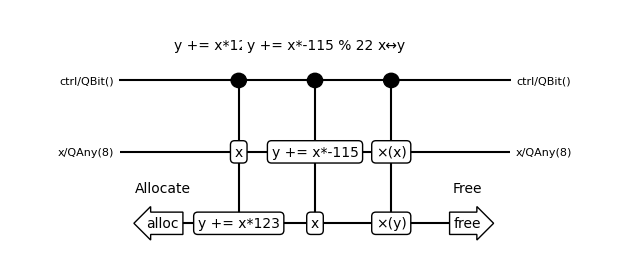

In [6]:
show_bloq(modmul.decompose_bloq(), type='musical_score')

### Call Graph

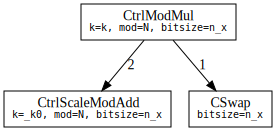

#### Counts totals:
 - `CSwap(bitsize=n_x)`: 1
 - `CtrlScaleModAdd(k=_k0, mod=N, bitsize=n_x)`: 2

In [7]:
from qualtran.resource_counting.generalizers import ignore_split_join
modmul_symb_g, modmul_symb_sigma = modmul_symb.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(modmul_symb_g)
show_counts_sigma(modmul_symb_sigma)